# Test on a RGB star

In [1]:
import sys
sys.path.append('/home/oliver/PhD/Hacks_and_Mocks/')
import lightkurve as lk
import warnings
warnings.filterwarnings('ignore')
print(lk.__version__)

1.1.dev


In [2]:
datalist = lk.search_lightcurvefile('KIC11615890')
data = datalist.download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data[0:8]:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 171.50 uHz
Our value for numax is: 13.10 uHz


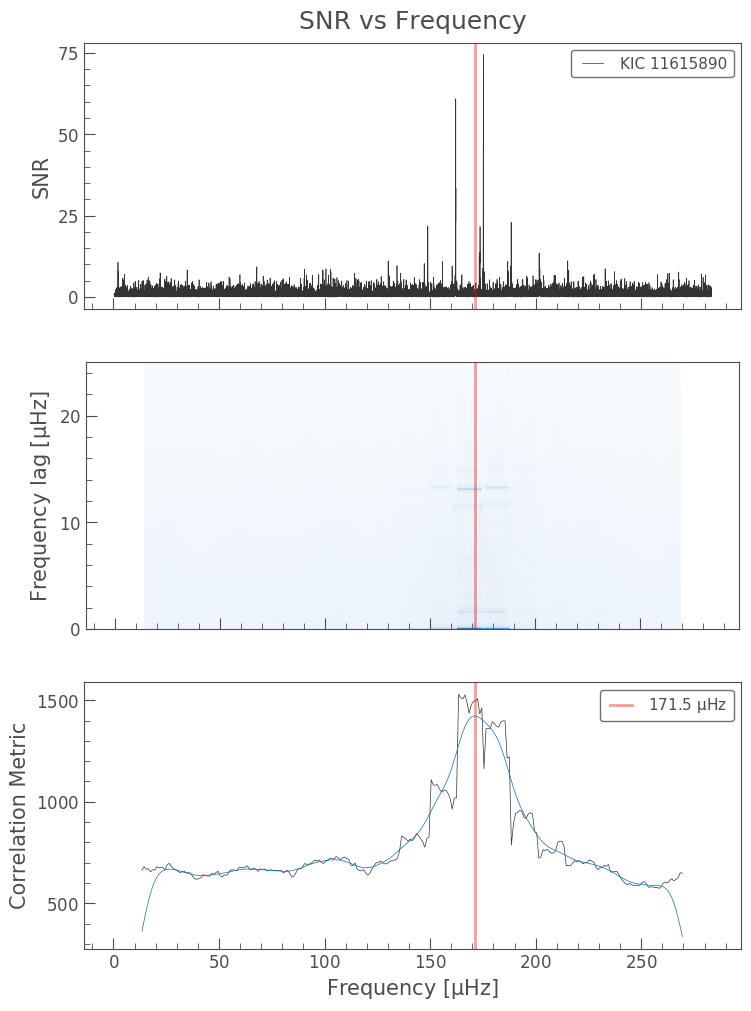

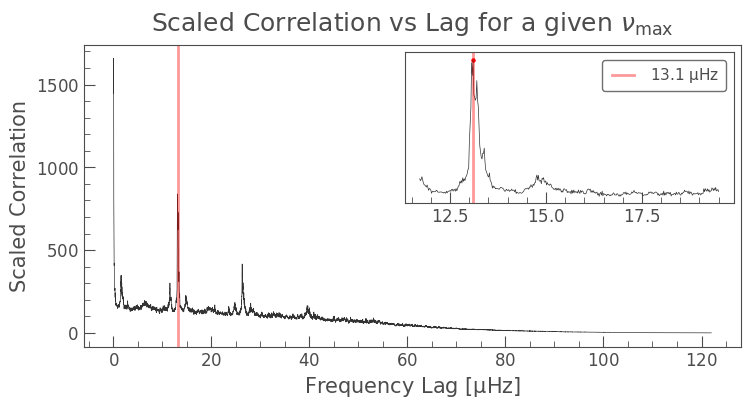

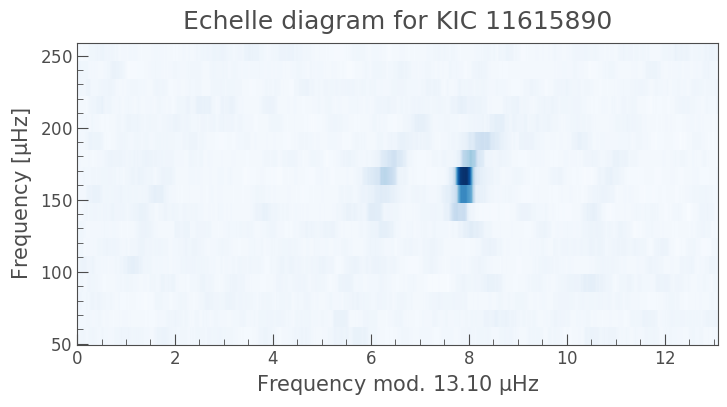

In [3]:
numax, ax = snr.plot_numax_diagnostics()
print('Our value for numax is: {:.2f}'.format(numax))
dnu, ax = snr.plot_dnu_diagnostics()
print('Our value for numax is: {:.2f}'.format(dnu))
snr.smooth(filter_width=.3).plot_echelle(dnu, numax)

In [4]:
teff = 4961 #APOKASC
print('Radius is: {:.3f}'.format(lk.estimate_radius(numax, dnu, teff)))
print('Mass is: {:.3f}'.format(lk.estimate_mass(numax, dnu, teff)))
print('log(g) is : {:.3f}'.format(lk.estimate_logg(numax, teff)))

Radius is: 5.471 solRad
Mass is: 1.540 solMass
log(g) is : 3.149 dex


The truths are: 5.188, 1.378,  3.557 respectively. Thats good enough for me! Especially given we're using uncorrected scaling relations.

# Test on a MS Star

In [5]:
datalist = lk.search_lightcurvefile('16CygA',cadence='short')
data = datalist[3:4].download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

Our value for numax is: 2170.00 uHz
Our value for numax is: 103.41 uHz


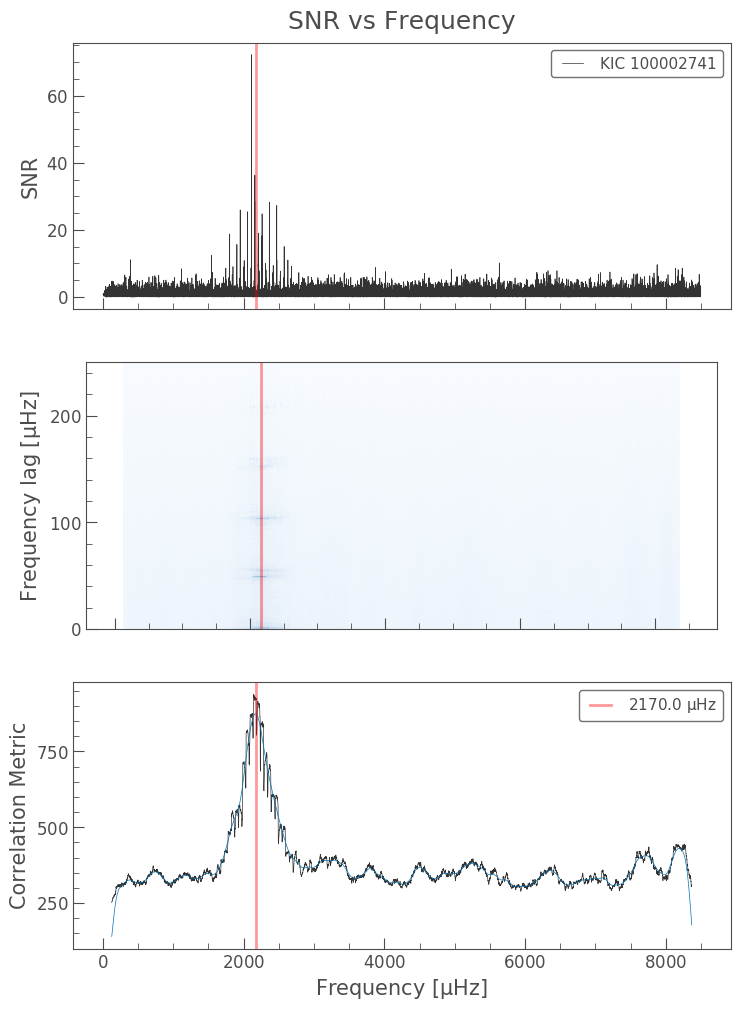

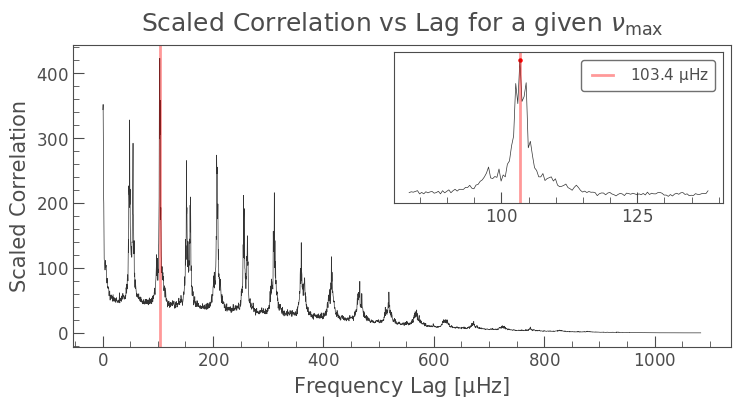

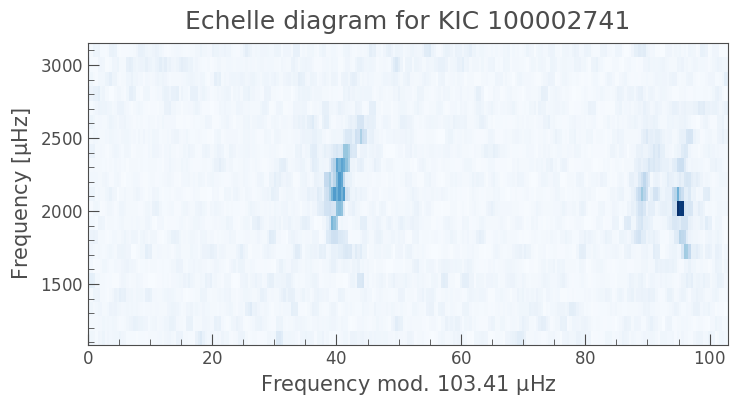

In [6]:
numax, ax = snr.plot_numax_diagnostics()
print('Our value for numax is: {:.2f}'.format(numax))
dnu, ax = snr.plot_dnu_diagnostics()
print('Our value for numax is: {:.2f}'.format(dnu))
snr.smooth(filter_width=1.).plot_echelle(dnu, numax)

In [7]:
teff = 5830 #APOKASC0
print('Radius is: {:.3f}'.format(lk.estimate_radius(numax, dnu.value, teff)))
print('Mass is: {:.3f}'.format(lk.estimate_mass(numax, dnu.value, teff)))
print('log(g) is : {:.3f}'.format(lk.estimate_logg(numax, teff)))

Radius is: 1.205 solRad
Mass is: 1.024 solMass
log(g) is : 4.287 dex


The truths are: 1.229, 1.08, 4.292 respectively. Thats good enough for me!